In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv("C:/Users/Akhil/Desktop/ASSIGNMENTS/bank-full.csv",sep=";")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
data.shape

(45211, 17)

In [4]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
Y = data.iloc[:,-1]
Y

0         no
1         no
2         no
3         no
4         no
        ... 
45206    yes
45207    yes
45208    yes
45209     no
45210     no
Name: y, Length: 45211, dtype: object

In [13]:
labelencoder = LabelEncoder()
df = labelencoder.fit_transform(Y)
df

array([0, 0, 0, ..., 1, 0, 0])

In [16]:
df

array([0, 0, 0, ..., 1, 0, 0])

In [15]:
X = data.iloc[:,0:16]
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown


In [17]:
A = pd.get_dummies(data=X,columns=["marital","default","job","education","housing","loan","contact","month","poutcome"])
A

,age,balance,day,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,0,1,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [18]:
classifier = LogisticRegression()
classifier.fit(A,Y)

C:\Users\samir\ANACONDA1\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred = classifier.predict(A)
y_pred

array(['no', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [29]:
labelencoder = LabelEncoder()
df1 = labelencoder.fit_transform(y_pred)
df1

array([0, 0, 0, ..., 1, 0, 0])

In [20]:
DF = pd.DataFrame({"Actual":Y,"Predicted":y_pred})
DF

,Actual,Predicted
0,no,no
1,no,no
2,no,no
3,no,no
4,no,no
...,...,...
45206,yes,yes
45207,yes,no
45208,yes,yes
45209,no,no


In [21]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(Y,y_pred)
CM

array([[39136,   786],
       [ 4104,  1185]], dtype=int64)

In [22]:
(1185+39136)/(39136+786+4104+1185)*100

89.1840481298799

In [23]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.94     39922
         yes       0.60      0.22      0.33      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [25]:
help(roc_curve)

Help on function roc_curve in module sklearn.metrics._ranking:

roc_curve(y_true, y_score, *, pos_label=None, sample_weight=None, drop_intermediate=True)
    Compute Receiver operating characteristic (ROC)
    
    Note: this implementation is restricted to the binary classification task.
    
    Read more in the :ref:`User Guide <roc_metrics>`.
    
    Parameters
    ----------
    
    y_true : array, shape = [n_samples]
        True binary labels. If labels are not either {-1, 1} or {0, 1}, then
        pos_label should be explicitly given.
    
    y_score : array, shape = [n_samples]
        Target scores, can either be probability estimates of the positive
        class, confidence values, or non-thresholded measure of decisions
        (as returned by "decision_function" on some classifiers).
    
    pos_label : int or str, default=None
        The label of the positive class.
        When ``pos_label=None``, if y_true is in {-1, 1} or {0, 1},
        ``pos_label`` is set to 

In [33]:
fpr,tpr,thresholds = roc_curve(df,classifier.predict_proba(A)[:,1])
auc = roc_auc_score(df,df1)

Text(0, 0.5, 'True Positive Rate')

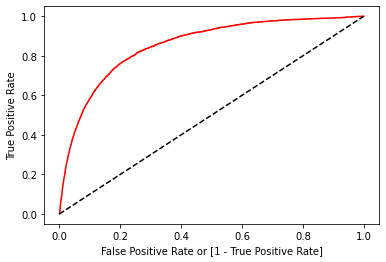

In [40]:
plt.plot(fpr,tpr,color="red",label="Logit Model (area = %0.2f)"%auc)
plt.plot([0,1],[0,1],"k--")
plt.xlabel("False Positive Rate or [1 - True Positive Rate]")
plt.ylabel("True Positive Rate")

In [41]:
auc

0.602180761276321

In [42]:
fpr

array([0.00000000e+00, 2.50488452e-05, 5.00976905e-05, ...,
       9.97971044e-01, 9.97971044e-01, 1.00000000e+00])